<h2> Figure for paper: Comparison of the PV of Xu with the optimal PV - A priori analysis

Comparison on the DNS dataset for the 10th layer

In [1]:
import os

#add the root directory
os.chdir('../')

In [2]:
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy.io import loadmat
from tools import *
import matplotlib.pyplot as plt
from loader import *
import logging

from plotly import graph_objects as go
import plotly.io as pio

logging.disable(logging.CRITICAL) #disable the logging

In [3]:
data_path = 'data-files/'
nbr_species = 21
nbr_rows = 1536
nbr_cols = 1024

layer = 10 #chose layer to inspect

In [4]:
files = [i for i in listdir(data_path) if isfile(join(data_path + i))]
print(f"Number of files: {len(files)}")

Number of files: 89


In [5]:
state_space_names = []
state_space_source_names = [] #to check it is the same order as the state space
Not_species = ["T","U","V","W","X","Z"]
state_space = np.zeros((1,nbr_species))
data_state_space = np.zeros((nbr_rows*nbr_cols,nbr_species))
data_state_space_source = np.zeros((nbr_rows*nbr_cols,nbr_species))
data_mf = np.zeros((nbr_rows*nbr_cols,1))
data_T = np.zeros((nbr_rows*nbr_cols,1))

counter_state_space = 0
counter_state_space_source = 0

for file in files:
    if file.endswith('.mat'):
        print(f"Busy with {file}")

        data = loadmat(data_path + file)

        filename = file.removesuffix('.mat')
        file_data = np.array(data[filename])
        

        #if name of the file is not starting with an uppercase
        if(not file[0] == "R" and file[0].isupper() and file[0] not in Not_species):
            state_space_names.append(file.removesuffix('_3D_slice.mat'))
            flattened_data = file_data[layer, 0][0, :, :].flatten()
            data_state_space[:,counter_state_space] = flattened_data

            counter_state_space+=1

        elif(file[0] == "R"):
            state_space_source_names.append(file.removesuffix('_3D_slice.mat'))
            flattened_data = file_data[layer, 0][0, :, :].flatten()
            data_state_space_source[:,counter_state_space_source] = flattened_data

            counter_state_space_source+=1

        elif(file[0] == "Z"):

            flattened_data = file_data[layer, 0][0, :, :].flatten()
            data_mf[:,0] = flattened_data
            
            print()
            print("mass fraction data done")
            print()

        elif(file[0] == "T"):

            flattened_data = file_data[layer, 0][0, :, :].flatten()
            data_T[:,0] = flattened_data
            
            print()
            print("Temperature data done")
            print()

print(state_space_names)
print(f"counters of state space and sources are {counter_state_space} and {counter_state_space_source}")

Busy with curvature_Condi_3D_slices.mat
Busy with H2NN_3D_slice.mat
Busy with H2O2_3D_slice.mat
Busy with H2O_3D_slice.mat
Busy with H2_3D_slice.mat
Busy with HNO_3D_slice.mat
Busy with HO2_3D_slice.mat
Busy with HONO2_3D_slice.mat
Busy with HONO_3D_slice.mat
Busy with H_3D_slice.mat
Busy with N2H3_3D_slice.mat
Busy with N2O_3D_slice.mat
Busy with N2_3D_slice.mat
Busy with NH2_3D_slice.mat
Busy with NH_3D_slice.mat
Busy with NNH_3D_slice.mat
Busy with NO2_3D_slice.mat
Busy with NO_3D_slice.mat
Busy with N_3D_slice.mat
Busy with O2_3D_slice.mat
Busy with OH_3D_slice.mat
Busy with O_3D_slice.mat
Busy with RH2NN_3D_slice.mat
Busy with RH2O2_3D_slice.mat
Busy with RH2O_3D_slice.mat
Busy with RH2_3D_slice.mat
Busy with RHNO_3D_slice.mat
Busy with RHO2_3D_slice.mat
Busy with RHONO2_3D_slice.mat
Busy with RHONO_3D_slice.mat
Busy with RH_3D_slice.mat
Busy with RN2H3_3D_slice.mat
Busy with RN2O_3D_slice.mat
Busy with RN2_3D_slice.mat
Busy with RNH2_3D_slice.mat
Busy with RNH_3D_slice.mat
Busy w

PV and PV source of Xu

In [6]:
PV_Xu = data_state_space[:,2] - data_state_space[:,3] - data_state_space[:,18]
PV_Xu = (PV_Xu - PV_Xu.min())/(PV_Xu.max() - PV_Xu.min())
PV_source_Xu = data_state_space_source[:,2] - data_state_space_source[:,3] - data_state_space_source[:,18]

Optimized PV and optimized PV source

In [7]:
filename = "Xu-AE-opt_RMSprop-epo_100000-lr_0.025-date_28Jan2025-hour_17h43_Tr35a_s3"
filename_metadata = filename + "_metadata.pkl"
path_metadata = "metadata/"
filename_species_names = "Xu-state-space-names.csv"
path_data = "data-files/"

loader = loadData(filename_species_names, path_metadata, filename_metadata)
idx_species_removed = loader.metadata["idx species removed"]
model = loader.loadModel()
id_model = loader.metadata["Training_id"]
output_idx = loader.metadata["output species idx"]
idx_species_removed = loader.metadata["idx species removed"]
input_scaling = loader.metadata["input scaling"]
input_species_scaling = loader.metadata["input species scaling"]
input_species_bias = loader.metadata["input species bias"]
range_mf  = loader.metadata["range_mf"]

optimized_PV = model.get_PV(torch.from_numpy(np.delete(data_state_space, idx_species_removed, axis=1))).detach().numpy()
optimized_PV_source = model.get_PV(torch.from_numpy(np.delete(data_state_space_source, idx_species_removed, axis=1))).detach().numpy()

***
<h2> Visualize f-PV manifolds coloured by QoIs

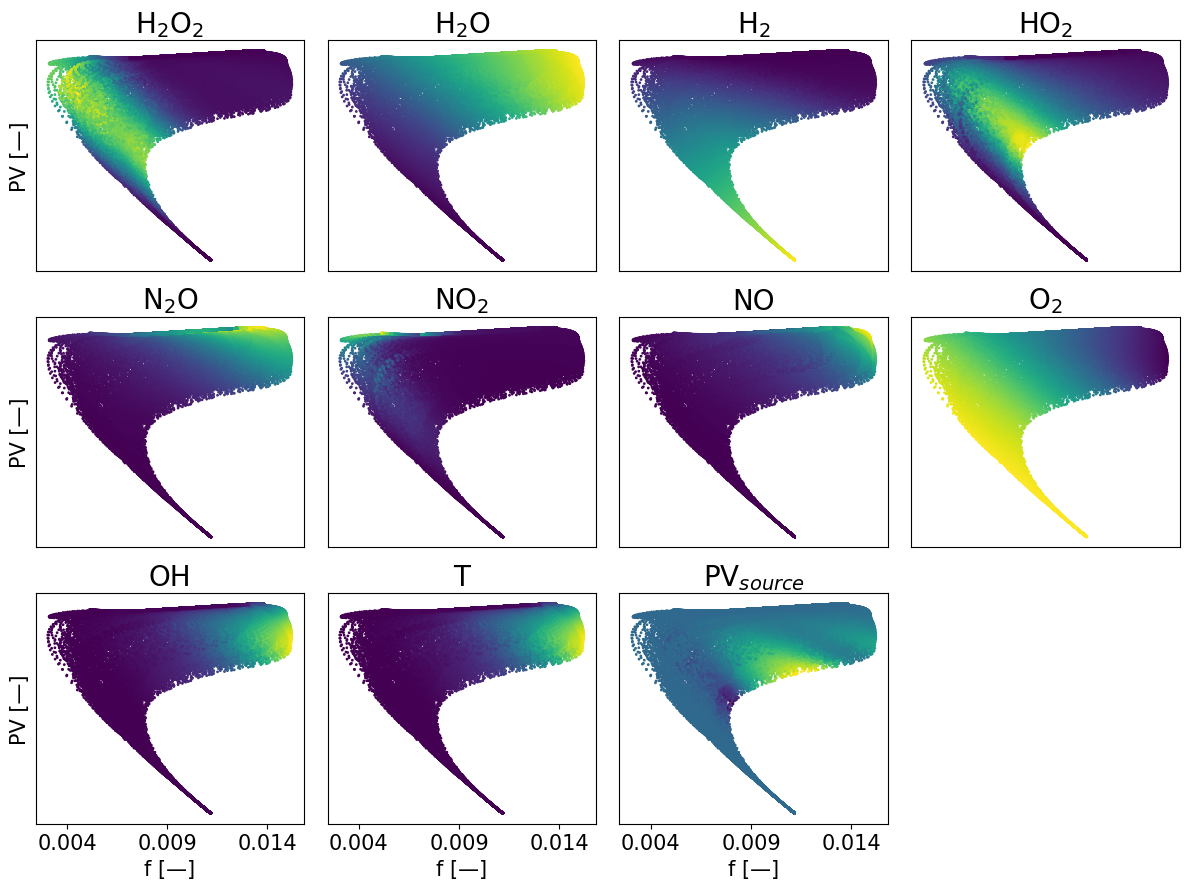

In [14]:
rows, cols = 3,4

keysSpecies = ['H2O2', 'H2O', 'H2', 'HO2', 'N2O', 'NO2', 'NO', 'O2', 'OH']
keys = ['H2O2', 'H2O', 'H2', 'HO2', 'N2O', 'NO2', 'NO', 'O2', 'OH', 'T', 'PV1']

Xu_optimized = "optimized"

save = True
pathSave = f"C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/A priori/{'Heuristic' if Xu_optimized.lower() == 'xu' else 'Optimized'}/"
name = f"f-PV manifolds - coloured by QoIs - {Xu_optimized}.png"

fig, axes = plt.subplots(rows, cols, figsize=(12,9))  # Define the grid
axes = axes.flatten()
for i, key in enumerate(keys):
    ax = axes[i]

    if(Xu_optimized.lower() == "xu"):
         dataPV = PV_Xu
    elif(Xu_optimized.lower() == "optimized"):
         dataPV = optimized_PV
    else:
         raise ValueError("Variable 'Xu_optimized' has an invalid value; Choose either 'xu' or 'optimized'.")

    if(key in keysSpecies):
         idxSpecies = state_space_names.index(key)
         dataColor = data_state_space[:,idxSpecies]
    elif(key == "T"):
         datacolor = data_T
    elif(key == "PV1"):
         if(Xu_optimized.lower() == "xu"):
            dataColor = PV_source_Xu
         elif(Xu_optimized.lower() == "optimized"):
            dataColor = optimized_PV_source
         

    ax.scatter(data_mf, dataPV, c = dataColor, cmap = "viridis", s=1)

    if(i>len(keys)-cols):
        ax.set_xticks([0.004, 0.009, 0.014])
        ax.tick_params(axis="x", labelsize=15)
        ax.set_xlabel("f [\u2014]", fontsize = 15)
    else:
        ax.set_xticks([])
    if(i%cols == 0):
        ax.set_ylabel(f'PV [\u2014]', fontsize = 15)
    ax.set_yticks([])
    
    key = key.replace("2", "$_{2}$").replace("1", "$_{source}$")

    ax.set_title(rf"{key}", fontsize=20)


for j in range(len(keys), len(axes)): #disables axes of plots not used
    axes[j].axis("off")

handles, labels = axes[0].get_legend_handles_labels()

plt.tight_layout()
if(save):
        plt.savefig(f"{pathSave}{name}", dpi = 300, bbox_inches="tight")
plt.show()

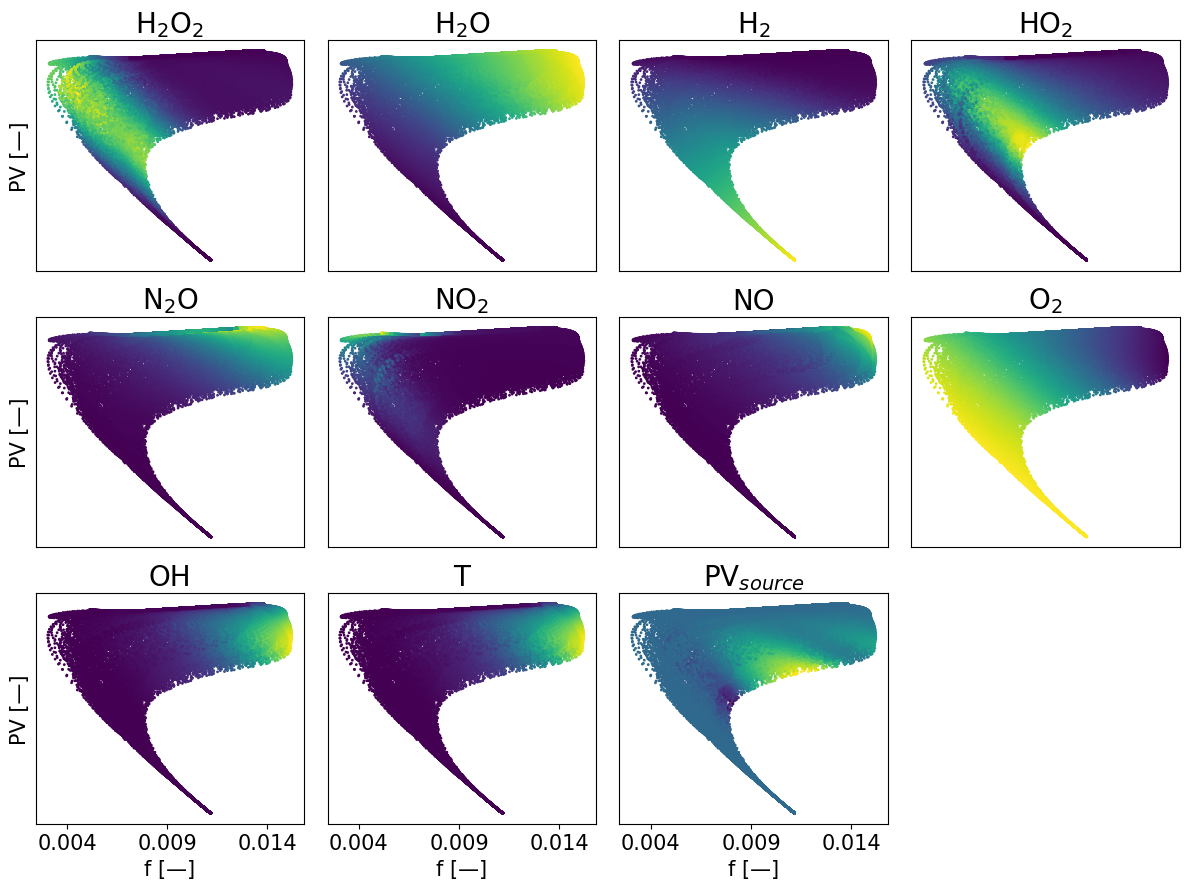

In [ ]:
rows, cols = 3,4

keysSpecies = ['H2O2', 'H2O', 'H2', 'HO2', 'N2O', 'NO2', 'NO', 'O2', 'OH']
keys = ['H2O2', 'H2O', 'H2', 'HO2', 'N2O', 'NO2', 'NO', 'O2', 'OH', 'T', 'PV1']

Xu_optimized = "optimized"

save = True
pathSave = f"C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/A priori/{'Heuristic' if Xu_optimized.lower() == 'xu' else 'Optimized'}/"
name = f"f-PV manifolds - coloured by QoIs - {Xu_optimized}.png"

fig, axes = plt.subplots(rows, cols, figsize=(12,9))  # Define the grid
axes = axes.flatten()
for i, key in enumerate(keys):
    ax = axes[i]

    if(Xu_optimized.lower() == "xu"):
         dataPV = PV_Xu
    elif(Xu_optimized.lower() == "optimized"):
         dataPV = optimized_PV
    else:
         raise ValueError("Variable 'Xu_optimized' has an invalid value; Choose either 'xu' or 'optimized'.")

    if(key in keysSpecies):
         idxSpecies = state_space_names.index(key)
         dataColor = data_state_space[:,idxSpecies]
    elif(key == "T"):
         datacolor = data_T
    elif(key == "PV1"):
         if(Xu_optimized.lower() == "xu"):
            dataColor = PV_source_Xu
         elif(Xu_optimized.lower() == "optimized"):
            dataColor = optimized_PV_source
         

    ax.scatter(data_mf, dataPV, c = dataColor, cmap = "viridis", s=1)

    if(i>len(keys)-cols):
        ax.set_xticks([0.004, 0.009, 0.014])
        ax.tick_params(axis="x", labelsize=15)
        ax.set_xlabel("f [\u2014]", fontsize = 15)
    else:
        ax.set_xticks([])
    if(i%cols == 0):
        ax.set_ylabel(f'PV [\u2014]', fontsize = 15)
    ax.set_yticks([])
    
    key = key.replace("2", "$_{2}$").replace("1", "$_{source}$")

    ax.set_title(rf"{key}", fontsize=20)


for j in range(len(keys), len(axes)): #disables axes of plots not used
    axes[j].axis("off")

handles, labels = axes[0].get_legend_handles_labels()

plt.tight_layout()
if(save):
        plt.savefig(f"{pathSave}{name}", dpi = 300, bbox_inches="tight")
plt.show()